# SQL PROJECT - Library Management System
---

In this porject I will create a database that store library information and answer some question using SQL queries.

This notebook is made with Azure Data Studio.

## 1. Create database and related tables
First I connect to master database and check whethere there has been LibraryManagementSystem database.
If not, then the database will be created.

In [ ]:
USE master
GO

IF NOT EXISTS (
    SELECT name
    FROM sys.databases
    WHERE name = 'LibraryManagementSystem'
)
CREATE DATABASE LibraryManagementSystem
GO

Before constructing tables, an ERD (Entity Relationship Diagram) should be designed to have an abstract view of the entities in the database and their relationships.

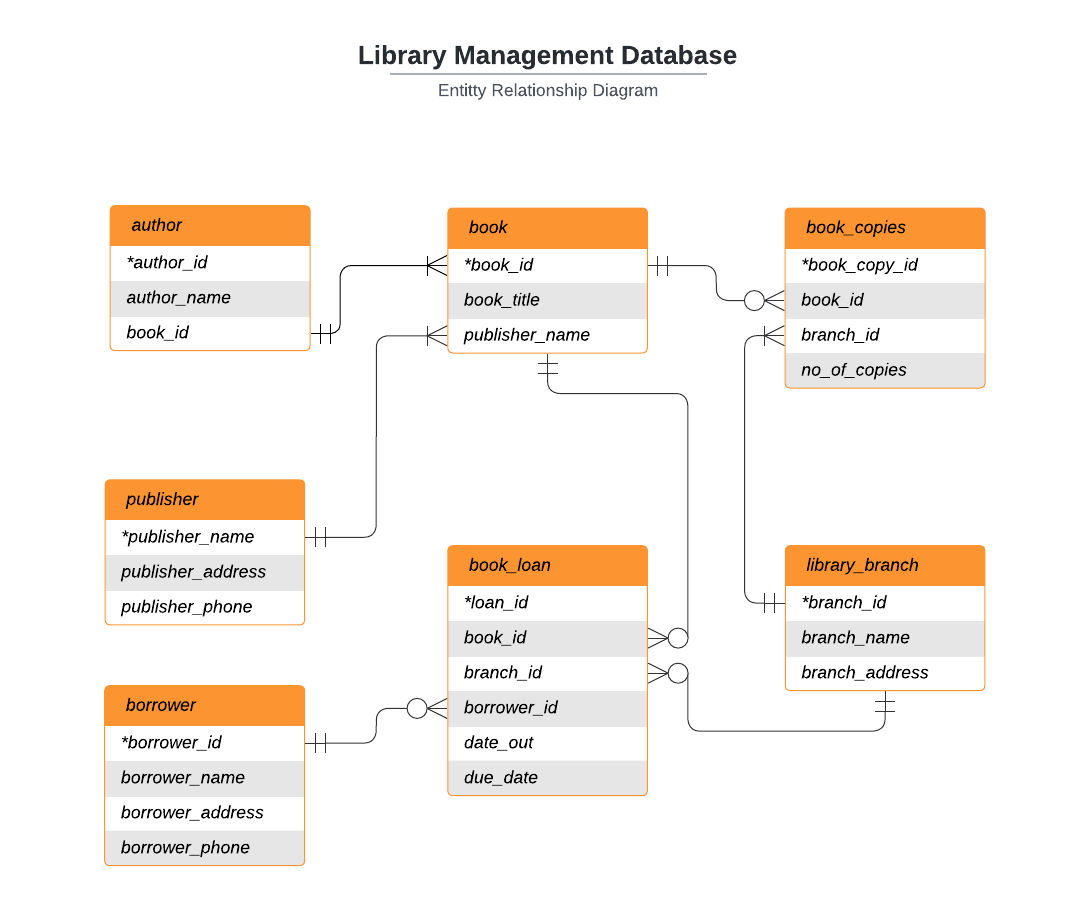

Next, I will create relational tables within library system. For simplicity, I will use only dbo schema.

In [ ]:
-- Publisher table
CREATE TABLE dbo.publisher (
    publisher_name VARCHAR(100) PRIMARY KEY NOT NULL,
    publisher_address VARCHAR(255) NOT NULL,
    publisher_phone VARCHAR(20) NOT NULL
)

-- Book table
CREATE TABLE book (
    book_id INT PRIMARY KEY NOT NULL IDENTITY (1,1), --[seed, increment]
    book_title VARCHAR(100) NOT NULL,
    publisher_name VARCHAR(100) NOT NULL 
    CONSTRAINT fk_publisher_name FOREIGN KEY REFERENCES dbo.publisher(publisher_name) 
    ON UPDATE CASCADE ON DELETE CASCADE  
)

-- Library branch table
CREATE TABLE library_branch (
    branch_id INT PRIMARY KEY NOT NULL IDENTITY (1,1),
    branch_name VARCHAR(100) NOT NULL,
    branch_address VARCHAR(100)
)

-- Borrower table
CREATE TABLE borrower (
    borrower_id INT PRIMARY KEY NOT NULL IDENTITY (100,1),
    borrower_name VARCHAR(100) NOT NULL,
    borrower_address VARCHAR(200) NOT NULL,
    borrower_phone VARCHAR(50) NOT NULL
)

-- Book loan table
CREATE TABLE book_loan (
    loan_id INT PRIMARY KEY NOT NULL IDENTITY (1,1),
    book_id INT NOT NULL CONSTRAINT fk_book_id FOREIGN KEY REFERENCES book(book_id) ON UPDATE CASCADE ON DELETE CASCADE,
    branch_id INT NOT NULL CONSTRAINT fk_library_branch_id FOREIGN KEY REFERENCES library_branch(branch_id) ON UPDATE CASCADE ON DELETE CASCADE,
    borrower_id INT NOT NULL CONSTRAINT fk_borrower_id FOREIGN KEY REFERENCES borrower(borrower_id) ON UPDATE CASCADE ON DELETE CASCADE,
    date_out DATE NOT NULL,
    due_date DATE NOT NULL
)

-- Book copies table
CREATE TABLE book_copies (
book_copy_id INT PRIMARY KEY NOT NULL IDENTITY (1,1),
book_id INT NOT NULL CONSTRAINT fk_book_id1 FOREIGN KEY REFERENCES book(book_id) ON UPDATE CASCADE ON DELETE CASCADE,
branch_id INT NOT NULL CONSTRAINT fk_library_branch_id1 FOREIGN KEY REFERENCES library_branch(branch_id) ON UPDATE CASCADE ON DELETE CASCADE,
no_of_copies INT NOT NULL
)

-- Author table
CREATE TABLE author (
    author_id INT PRIMARY KEY NOT NULL IDENTITY (1,1),
    author_name VARCHAR(100) NOT NULL,
    book_id INT NOT NULL CONSTRAINT fk_book_id2 FOREIGN KEY REFERENCES book(book_id) ON UPDATE CASCADE ON DELETE CASCADE
)

--- 
## 2. Populating data into tables

I will write INSERT statement for publisher table as an example and have a peek. Other tables will be the same.

In [ ]:
INSERT INTO dbo.publisher
    (publisher_name, publisher_address, publisher_phone)
VALUES 
    ('DAW Books','375 Hudson Street, New York, NY 10014','212-366-2000'),
    ('Viking','375 Hudson Street, New York, NY 10014','212-366-2000'),
    ('Signet Books','375 Hudson Street, New York, NY 10014','212-366-2000'),
    ('Chilton Books','Not Available','Not Available'),
    ('George Allen & Unwin','83 Alexander Ln, Crows Nest NSW 2065, Australia','+61-2-8425-0100'),
    ('Alfred A. Knopf','The Knopf Doubleday Group Domestic Rights, 1745 Broadway, New York, NY 10019','212-940-7390'),		
    ('Bloomsbury','Bloomsbury Publishing Inc., 1385 Broadway, 5th Floor, New York, NY 10018','212-419-5300'),
    ('Shinchosa','Oga Bldg. 8, 2-5-4 Sarugaku-cho, Chiyoda-ku, Tokyo 101-0064 Japan','+81-3-5577-6507'),
    ('Harper and Row','HarperCollins Publishers, 195 Broadway, New York, NY 10007','212-207-7000'),
    ('Pan Books','175 Fifth Avenue, New York, NY 10010','646-307-5745'),
    ('Chalto & Windus','375 Hudson Street, New York, NY 10014','212-366-2000'),
    ('Harcourt Brace Jovanovich','3 Park Ave, New York, NY 10016','212-420-5800'),
    ('W.W. Norton',' W. W. Norton & Company, Inc., 500 Fifth Avenue, New York, New York 10110','212-354-5500'),
    ('Scholastic','557 Broadway, New York, NY 10012','800-724-6527'),
    ('Bantam','375 Hudson Street, New York, NY 10014','212-366-2000'),
    ('Picador USA','175 Fifth Avenue, New York, NY 10010','646-307-5745')

Let's have a peek at the publisher table.

In [1]:
SELECT TOP (10) *
FROM dbo.publisher

(10 rows affected)

Total execution time: 00:00:00.065

publisher_name,publisher_address,publisher_phone
Alfred A. Knopf,"The Knopf Doubleday Group Domestic Rights, 1745 Broadway, New York, NY 10019",212-940-7390
Bantam,"375 Hudson Street, New York, NY 10014",212-366-2000
Bloomsbury,"Bloomsbury Publishing Inc., 1385 Broadway, 5th Floor, New York, NY 10018",212-419-5300
Chalto & Windus,"375 Hudson Street, New York, NY 10014",212-366-2000
Chilton Books,Not Available,Not Available
DAW Books,"375 Hudson Street, New York, NY 10014",212-366-2000
George Allen & Unwin,"83 Alexander Ln, Crows Nest NSW 2065, Australia",+61-2-8425-0100
Harcourt Brace Jovanovich,"3 Park Ave, New York, NY 10016",212-420-5800
Harper and Row,"HarperCollins Publishers, 195 Broadway, New York, NY 10007",212-207-7000
Pan Books,"175 Fifth Avenue, New York, NY 10010",646-307-5745


---
## 3. Answering some questions using queries

**Question 1:** How many copies of the book titled "The Lost Tribe" are owned by the library branch whose name is "Sharpstown"?

In [3]:
SELECT
    l.branch_name,
    c.no_of_copies copies
FROM dbo.book_copies c
    INNER JOIN dbo.library_branch l ON c.branch_id = l.branch_id
    INNER JOIN dbo.book b ON c.book_id = b.book_id 
WHERE
    l.branch_name = 'Sharpstown' AND
    b.book_title = 'The Lost Tribe'
GROUP BY l.branch_name

(1 row affected)

Total execution time: 00:00:00.007

branch_name,copies
Sharpstown,5


**Question 2:** Retrieve the names of all borrowers who do not have any books checked out.

In [4]:
SELECT borrower_name
FROM dbo.borrower b
WHERE NOT EXISTS (
    SELECT *
    FROM dbo.book_loan l
    WHERE l.borrower_id = b.borrower_id
)

(1 row affected)

Total execution time: 00:00:00.018

borrower_name
Jane Smith


**Question 3:** For each book that is loaned out from the "Sharpstown" branch and whose DueDate is today, retrieve the book title, the borrower's name, and the borrower's address.


In [5]:
WITH cte_sharpstown (branch_id, branch_name) AS (
    SELECT branch_id, 
    branch_name
    FROM dbo.library_branch
    WHERE branch_name = 'Sharpstown'
),
cte_duedate AS (
    SELECT *
    FROM dbo.book_loan
    WHERE due_date = '20180203'
)

SELECT
    b.book_title,
    br.borrower_name,
    br.borrower_address
FROM cte_duedate d
INNER JOIN cte_sharpstown s ON d.branch_id = s.branch_id
INNER JOIN dbo.book b ON d.book_id = b.book_id
INNER JOIN dbo.borrower br ON d.borrower_id = br.borrower_id

(6 rows affected)

Total execution time: 00:00:00.022

book_title,borrower_name,borrower_address
The Hobbit,Tom Li,"981 Main Street, Ann Arbor, MI 48104"
Eragon,Tom Li,"981 Main Street, Ann Arbor, MI 48104"
A Wise Mans Fear,Tom Li,"981 Main Street, Ann Arbor, MI 48104"
Harry Potter and the Philosophers Stone,Tom Li,"981 Main Street, Ann Arbor, MI 48104"
Hard Boiled Wonderland and The End of the World,Tom Li,"981 Main Street, Ann Arbor, MI 48104"
The Hitchhikers Guide to the Galaxy,Tom Li,"981 Main Street, Ann Arbor, MI 48104"


**Question 4:** For each library branch, retrieve the branch name and the total number of books loaned out from that branch.

In [6]:
SELECT 
    b.branch_name,
    COUNT(l.loan_id)
FROM dbo.library_branch b
INNER JOIN dbo.book_loan l ON b.branch_id = l.branch_id
GROUP BY branch_name
ORDER BY branch_name

(4 rows affected)

Total execution time: 00:00:00.051

branch_name,(No column name)
Ann Arbor,20
Central,11
Saline,10
Sharpstown,10


**Question 5:** Retrieve the names, addresses, and number of books checked out for all borrowers who have more than five books checked out.

In [8]:
SELECT
    br.borrower_name,
    br.borrower_address,
    COUNT(l.date_out) book_checked_out
FROM dbo.borrower br 
INNER JOIN dbo.book_loan l ON br.borrower_id = l.borrower_id
GROUP BY 
    br.borrower_name,
    br.borrower_address
HAVING COUNT(l.date_out) > 5

(5 rows affected)

Total execution time: 00:00:00.025

borrower_name,borrower_address,book_checked_out
Joe Smith,"1321 4th Street, New York, NY 10014",7
Angela Thompson,"2212 Green Avenue, Ann Arbor, MI 48104",11
Tom Haverford,"23 75th Street, New York, NY 10014",6
Michael Horford,"653 Glen Avenue, Ann Arbor, MI 48104",8
Tom Li,"981 Main Street, Ann Arbor, MI 48104",14


**Question 6:** For each book authored by "Stephen King", retrieve the title and the number of copies owned by the library branch whose name is "Central".

In [1]:
SELECT
    b.book_title,
    c.no_of_copies copies
FROM dbo.book_copies c 
INNER JOIN dbo.book b ON c.book_id = b.book_id
WHERE 
    b.book_id IN (
        SELECT book_id
        FROM dbo.author
        WHERE author_name = 'Stephen King'
    )
AND c.branch_id IN (
        SELECT branch_id
        FROM dbo.library_branch
        WHERE branch_name = 'Central'

)
ORDER BY b.book_title

(2 rows affected)

Total execution time: 00:00:00.092

book_title,copies
It,5
The Green Mile,5
